In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
%matplotlib inline
plt.style.use('seaborn-v0_8')

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Text(0, 0.5, 'Correlation coefficient')

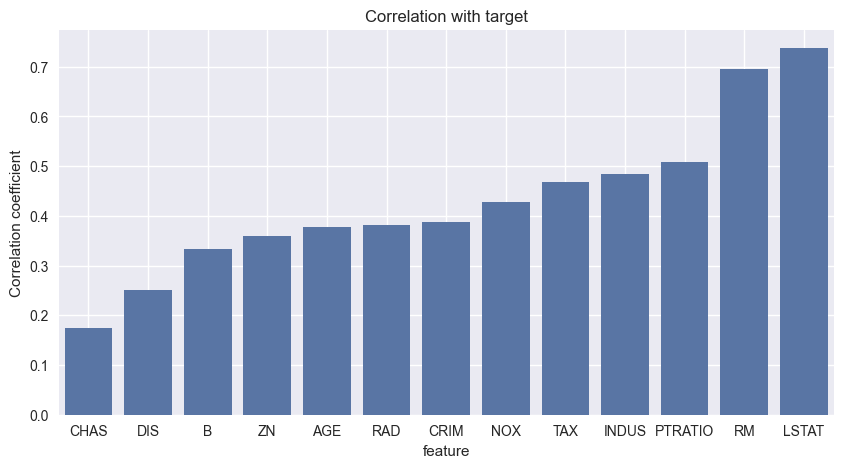

In [13]:
corr_with_targert = boston_data.corr()['MEDV'].abs().sort_values()
corr_with_targert = corr_with_targert.drop('MEDV')

fig, ax = plt.subplots(figsize = (10,5))
bar = sns.barplot(corr_with_targert)
bar.grid(True)
bar.set_title('Correlation with target')
bar.set_xlabel('feature')
bar.set_ylabel('Correlation coefficient')

In [15]:
X = boston_data[['LSTAT']]
y = boston_data['MEDV']
X.head()

,LSTAT
0,4.98
1,9.14
2,4.03
3,2.94
4,5.33


In [16]:
def linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    Q = np.linalg.inv(X.T @ X)
    w = Q @ X.T @ y
    
    return w

In [17]:
w = linear_regression(X, y)

print('Vactor w: {}'.format(w))

print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))


Vactor w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


In [21]:
def plot_regression_2d(X, y_true, y_predict, xlabel = 'LSTAT', ylabel = 'MEDV'):
    fig, ax = plt.subplots(figsize = (8,4))
    ax.scatter(X, y_true, alpha=0.7, label = 'Sample data')
    ax.plot(X, y_predict, color = 'black', label = 'Regression model')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(facecolor = 'white', fontsize = 11)

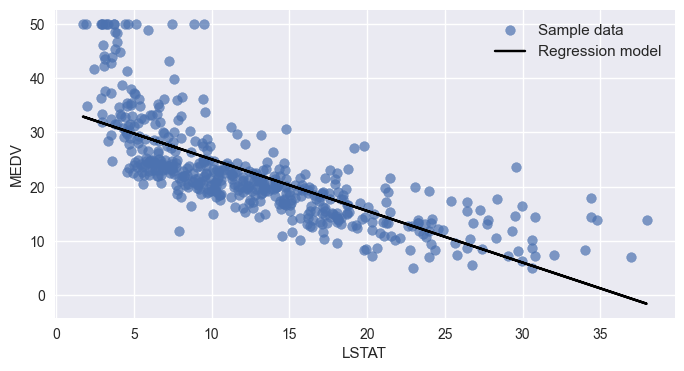

In [22]:
y_predict = w[0] + w[1]*X

plot_regression_2d(X, y, y_predict)

In [23]:
from sklearn import linear_model

lr_lstat = linear_model.LinearRegression()

lr_lstat.fit(X, y)

print('w0: {}'.format(lr_lstat.intercept_))
print('w1: {}'.format(lr_lstat.coef_))



w0: 34.5538408793831
w1: [-0.95004935]


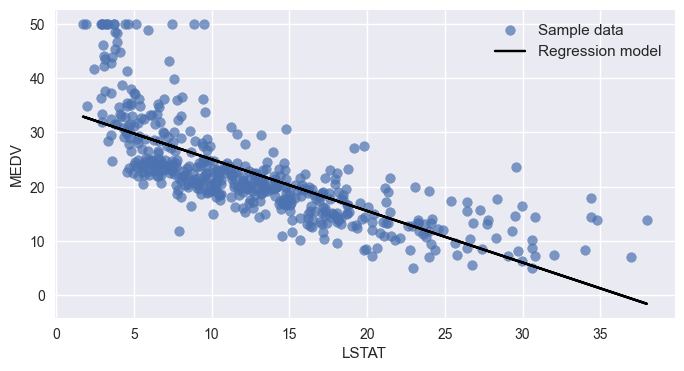

In [24]:
y_predict = lr_lstat.predict(X)

plot_regression_2d(X, y, y_predict)

In [25]:
feats = boston_data.drop('MEDV', axis=1).columns
X = boston_data[feats]
y = boston_data['MEDV']

lr_full = linear_model.LinearRegression()

lr_full.fit(X, y)


LinearRegression()

In [28]:
w_df = pd.DataFrame({'Features': feats, 'Coefficient': lr_full.coef_})

intercept_df = pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficient': lr_full.intercept_})

coef_df = pd.concat([w_df, intercept_df], ignore_index=True)

display(coef_df)

,Features,Coefficient
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


Text(0, 0.5, 'Model')

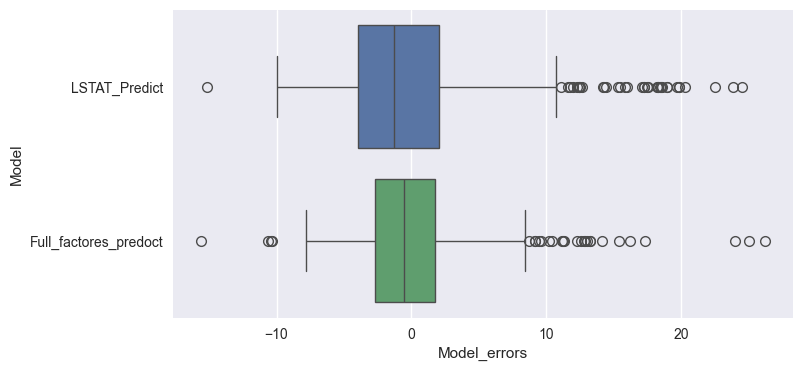

In [29]:
fig, ax = plt.subplots(figsize = (8,4))

y_errots_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])

y_errors_full = y - lr_full.predict(boston_data[feats])

errors_df = pd.DataFrame({'LSTAT_Predict': y_errots_lstat, 'Full_factores_predoct': y_errors_full})

sns.boxplot(
    data = errors_df,
    orient='h',
    ax=ax
    )

ax.set_xlabel('Model_errors')
ax.set_ylabel('Model')

**TASK 2-7**

In [47]:
test_dict = {
'CRIM' :        0.35114,
'ZN' :          0.00000,
'INDUS' :       7.38000,
'CHAS'  :       0.00000,
'NOX'   :       0.49300,
'RM'     :      6.04100,
'AGE'     :    49.90000,
'DIS'      :    4.72110,
'RAD'       :   5.00000,
'TAX'   :     287.00000,
'PTRATIO':     19.60000,
'B'       :   396.90000,
'LSTAT'    :    7.70000
}

test_df = pd.DataFrame.from_dict(test_dict, orient='index')

test_df = test_df.T

test_df

y_test_pred = lr_full.predict(test_df)
# test_df = test_df.rename_axis('index1').reset_index()

y_test_pred

array([22.86952447])

**TASK 2-8**

In [57]:
df_50 = pd.read_csv('data/50_Startups.csv')
df_50

features = ['R&D Spend', 'Administration', 'Marketing Spend']

X = df_50[features]
y = df_50['Profit']

df_50_lrfull = linear_model.LinearRegression()

df_50_lrfull.fit(X,y)

df_w_50 = pd.DataFrame({
    'Features': features,
    'Coefficient': df_50_lrfull.coef_
})

df_w_50_intercept = pd.DataFrame({
    'Features': ['INTERCEPT'],
    'Coefficient': df_50_lrfull.intercept_
})

df_w = pd.concat([df_w_50, df_w_50_intercept], ignore_index=True)

df_w


,Features,Coefficient
0,R&D Spend,0.805715
1,Administration,-0.026816
2,Marketing Spend,0.027228
3,INTERCEPT,50122.192990


In [58]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**3-2**


In [62]:
from sklearn import metrics


y_true_e = [1.23, 2.35, 2.75] 
y_pred_e = [1.01, 12.3, 2.74]

print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y_true_e, y_pred_e))))

RMSE score: 5.746 thou. $


**3-3**

In [65]:
y_true_e = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred_e = [20.5, 20.2, 20.3, 19.0, 11.0]

print('RMSE score: {:.3f} thou. $'.format(metrics.r2_score(y_true_e, y_pred_e)))

RMSE score: 0.708 thou. $


In [66]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
%matplotlib inline
plt.style.use('seaborn-v0_8')

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [67]:
X = boston_data[['LSTAT']]
y = boston_data['MEDV']

In [68]:
sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)
sgd_lr_lstat.fit(X,y)

SGDRegressor(random_state=42)

In [70]:
print('w0: {}'.format(sgd_lr_lstat.intercept_))
print('w1: {}'.format(sgd_lr_lstat.coef_))


w0: [34.33010969]
w1: [-0.96193242]


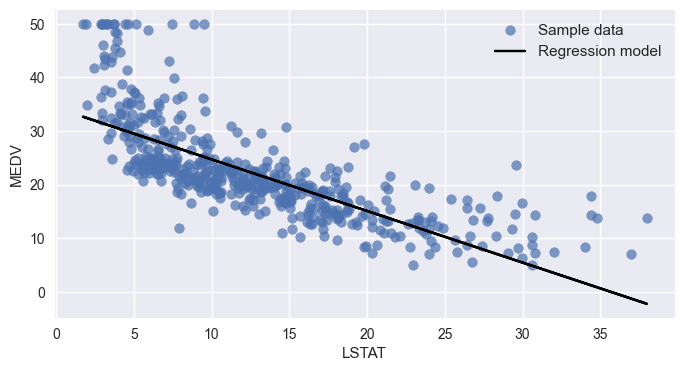

In [72]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.scatter(X, y_true, alpha=0.7, label = 'Sample data')
    ax.plot(X, y_predict, color = 'black', label = 'Regression model')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(facecolor = 'white', fontsize = 11)

y_predict = sgd_lr_lstat.predict(X)

plot_regression_2d(X, y, y_predict)

In [76]:
print('R2 metric: {:.3f}'.format(metrics.r2_score(y, y_predict), 3))

R2 metric: 0.542


In [79]:
features = boston_data.drop('MEDV', axis=1).columns

X = boston_data[features]
y = boston_data['MEDV']

sgd_lr_full = linear_model.SGDRegressor(random_state=42)

sgd_lr_full.fit(X, y)

df_w = pd.DataFrame({
    'Features': features,
    'Coefficient': sgd_lr_full.coef_
})

intercept_df = pd.DataFrame({
    'Features': ['INTERCEPT'],
    'Coefficient': sgd_lr_full.intercept_
})

coef_df = pd.concat([df_w, intercept_df], ignore_index=True)

coef_df

,Features,Coefficient
0,CRIM,2.156857e+11
1,ZN,1.248446e+10
2,INDUS,7.277644e+09
3,CHAS,8.306154e+09
4,NOX,-8.413828e+09
5,RM,-3.148182e+10
6,AGE,8.685820e+10
7,DIS,-2.256141e+11
8,RAD,-4.683208e+10
9,TAX,1.892286e+09


In [80]:
y_predict = sgd_lr_full.predict(X)

print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -10590303862129979358707712.000


In [82]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=features)

X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [ ]:
sgd_lr_full = linear_model.SGDRegressor(random_state=42)

sgd_lr_full.fit(X_scaled, y)

df_w = pd.DataFrame({
    'Feature': features, 
    'Coefficient': sgd_lr_full.coef_
})

intercept_df = pd.DataFrame({
    'Feature': ['INTERCEPT'],
    'Coefficient': sgd_lr_full.intercept_
})

coed_df = pd.concat([df_w, intercept_df], ignore_index=True)

coed_df

,Feature,Coefficient
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


In [84]:
y_predict = sgd_lr_full.predict(X_scaled)

print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.740


**4-9**

In [85]:
sgd_lr_full = linear_model.SGDRegressor(random_state=42, tol=0.1)

sgd_lr_full.fit(X_scaled, y)

df_w = pd.DataFrame({
    'Feature': features, 
    'Coefficient': sgd_lr_full.coef_
})

intercept_df = pd.DataFrame({
    'Feature': ['INTERCEPT'],
    'Coefficient': sgd_lr_full.intercept_
})

coed_df = pd.concat([df_w, intercept_df], ignore_index=True)

coed_df

,Feature,Coefficient
0,CRIM,-0.774950
1,ZN,0.750673
2,INDUS,-0.344471
3,CHAS,0.735669
4,NOX,-1.435374
5,RM,3.034863
6,AGE,-0.197104
7,DIS,-2.584404
8,RAD,1.250083
9,TAX,-0.751064


In [86]:
y_predict = sgd_lr_full.predict(X_scaled)

print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.735


<Axes: xlabel='Date', ylabel='Close/Last'>

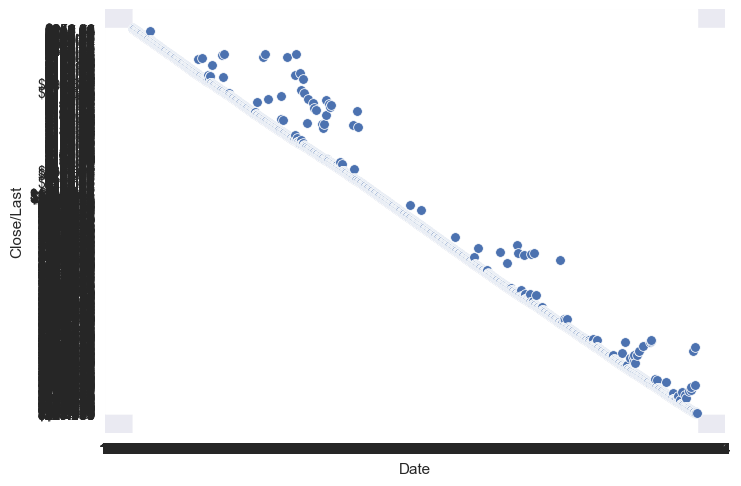

In [91]:
df = pd.read_csv('data/HistoricalData_1734550278262.csv')

df.head()

sns.scatterplot(df, x='Date', y = 'Close/Last')

In [92]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
%matplotlib inline
plt.style.use('seaborn-v0_8')

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_data = pd.read_csv('data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
boston_data.head()

#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)

Train:  (354, 13) (354,)
Test:  (152, 13) (152,)


In [94]:
lr_model = linear_model.LinearRegression()

lr_model.fit(X_train, y_train)

y_train_predict = lr_model.predict(X_train)

y_test_predict = lr_model.predict(X_test)

print('R2 score TRAIN: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
print('R2 score TEST: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))

R2 score TRAIN: 0.743
R2 score TEST: 0.722


In [95]:
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)

poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)

X_test_scaled_poly = poly.transform(X_test_scaled)

print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

(354, 104)
(152, 104)


In [97]:
lasso_lr_poly = linear_model.Lasso(alpha=0.1)

lasso_lr_poly.fit(X_train_scaled_poly, y_train)

y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)

y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)


print('R2 TRAIN: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict_poly)))
print('R2 TEST: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))

R2 TRAIN: 0.879
R2 TEST: 0.882


In [101]:
ridge_lr_poly = linear_model.Ridge(alpha=10)

ridge_lr_poly.fit(X_train_scaled_poly, y_train)

y_train_ridge_predict = ridge_lr_poly.predict(X_train_scaled_poly)

y_test_ridge_predict = ridge_lr_poly.predict(X_test_scaled_poly)


print('R2 TRAIN: {:.3f}'.format(metrics.r2_score(y_train, y_train_ridge_predict)))
print('R2 TEST: {:.3f}'.format(metrics.r2_score(y_test, y_test_ridge_predict)))

R2 TRAIN: 0.907
R2 TEST: 0.848


In [118]:
alpha_list = np.linspace(0.001, 40, 20)

train_scores = []
test_scores = []

for alpha in alpha_list:
    ridge_lr_poly = linear_model.Ridge(alpha=alpha)

    ridge_lr_poly.fit(X_train_scaled_poly, y_train)

    y_train_ridge_predict = ridge_lr_poly.predict(X_train_scaled_poly)

    y_test_ridge_predict = ridge_lr_poly.predict(X_test_scaled_poly)

    train_scores.append(metrics.r2_score(y_train, y_train_ridge_predict))
    test_scores.append(metrics.r2_score(y_test, y_test_ridge_predict))

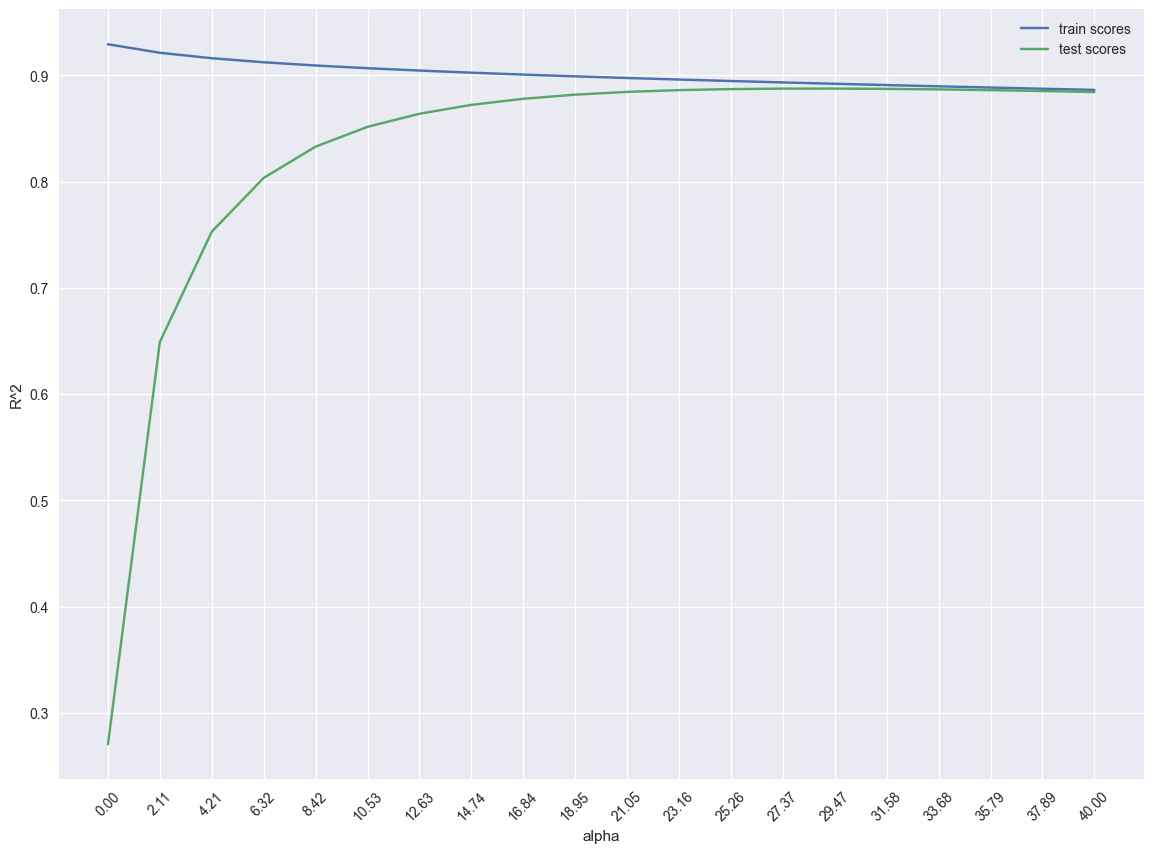

In [119]:
fig, ax = plt.subplots(figsize = (14, 10))

ax.plot(alpha_list, train_scores, label = 'train scores')
ax.plot(alpha_list, test_scores, label = 'test scores')
ax.set_xlabel('alpha')
ax.set_ylabel('R^2')
ax.set_xticks(alpha_list)
ax.xaxis.set_tick_params(rotation = 45)
# ax.xaxis.set_major_locator(alpha_list.AutoLocator())
# ax.set_xtick(range(0, 20, 20), rotation = 45)
ax.legend()

In [120]:
ridge_lr_poly = linear_model.Ridge(alpha=27.37)

ridge_lr_poly.fit(X_train_scaled_poly, y_train)

y_train_ridge_predict = ridge_lr_poly.predict(X_train_scaled_poly)

y_test_ridge_predict = ridge_lr_poly.predict(X_test_scaled_poly)


print('R2 TRAIN: {:.3f}'.format(metrics.r2_score(y_train, y_train_ridge_predict)))
print('R2 TEST: {:.3f}'.format(metrics.r2_score(y_test, y_test_ridge_predict)))

R2 TRAIN: 0.893
R2 TEST: 0.888
